   
   
   # MALIGNANT COMMENTS CLASSIFICATION
 
 
 ## Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

#### Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

#### The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 
You need to build a model that can differentiate between comments and its categories.  
Refer to the data set file provided along with this. 


## Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Giving the training and the testing data to the model.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Documentation:-
    
    Here as I can see that there is no need of "ID" so, here I am dropping this column.

In [4]:
train = train.drop(columns = ["id"])
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


Documentation:- 

    I can clearly see that the "ID" column, has been deleted from the dataset.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


Documentation:-
    
    Here, I can see that the column, "Comment_text" is object type and the rest are int type.

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [7]:
train.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Here, I can see that there are no null values present in the dataset,

In [8]:
train.duplicated().sum()

0

Here, I can see that there are also no duplicate values present in the dataset.

In [9]:
train['comment_text'].value_counts()

"== Early Life ==\n""After graduating from high school in Weymouth[citation needed]""\n\nWhile doing an assignment my instructor sent us to the Chicago Public Library site\n\nIt states, ""After she attended public school in Monroeville she attended Huntingdon College, a private school for women in Montgomery for a year and then transferred to the University of Alabama. After graduation, Lee studied at Oxford University. She returned to the University of Alabama to study law but withdrew six months before graduation.""\n\nThought this might help if anyone would like to write it in wiki style.  I don't have the time. ;)  \n\n Black and White Ball\nWhat's with the line about the Black And White Ball of Truman Capote's?  Is it really a pertinent biographical detail to say that Ms. Lee was extended an invitation?  Not being a scholar on the subject, I may be missing something, but if it's really important, could it be fleshed out a bit to make it clear that it's more than useless trivia?\n 

In [10]:
train["malignant"].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

Here, I can see the value counts, of the column, "Malignant".

In [11]:
train["highly_malignant"].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

Here, I can see the value counts, of the column, "Highly_malignant".

In [12]:
train["rude"].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

Here, I can see the value counts, of the column, "Rude".

In [13]:
train["threat"].value_counts()

0    159093
1       478
Name: threat, dtype: int64

Here, I can see the value counts, of the column, "Threat".

In [14]:
train["abuse"].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

Here, I can see the value counts, of the column, "Abuse".

In [15]:
train["loathe"].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

Here, I can see the value counts, of the column, "Loathe".

In [16]:
train.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [17]:
corr = train.corr()
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


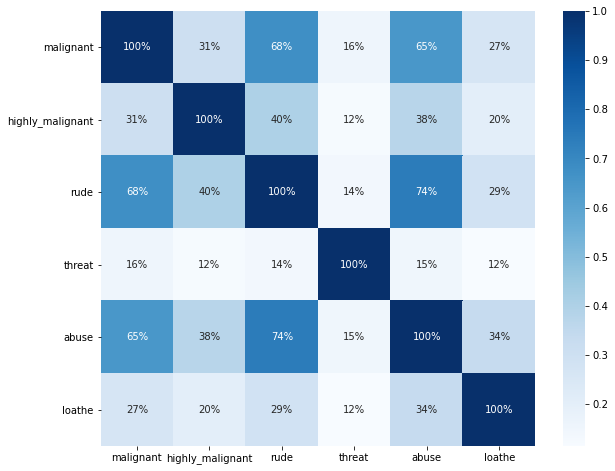

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size':10}, cmap = 'Blues')
plt.show()

Here, I have plotted the graph to see the corelation between the two coloumns.

In [19]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

Here, I can see the coloumns, which all are highly skewed.

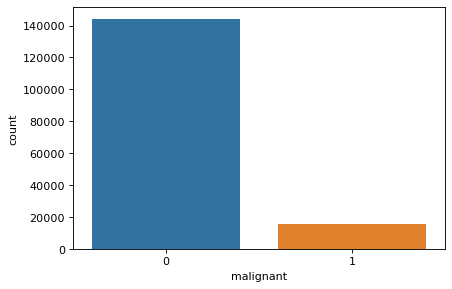

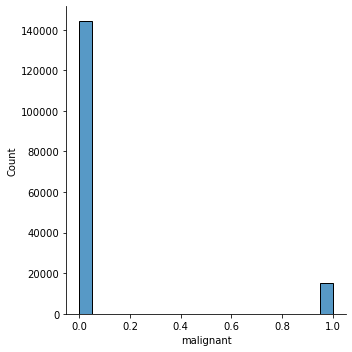

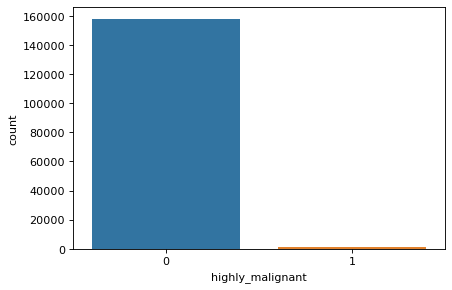

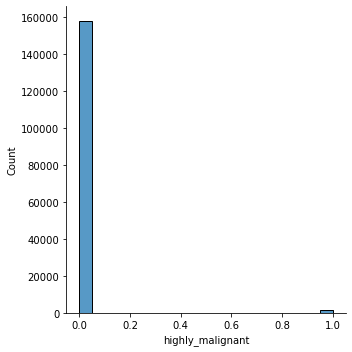

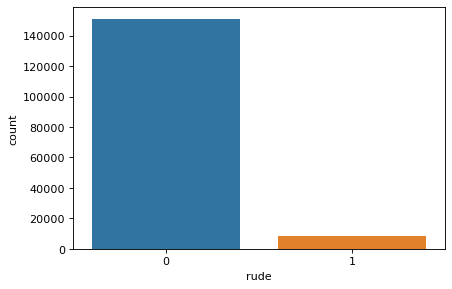

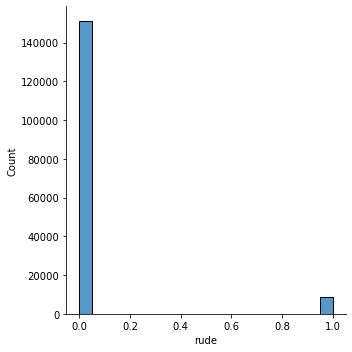

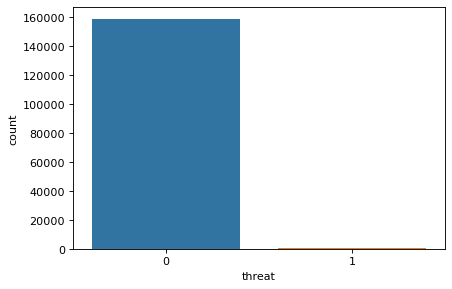

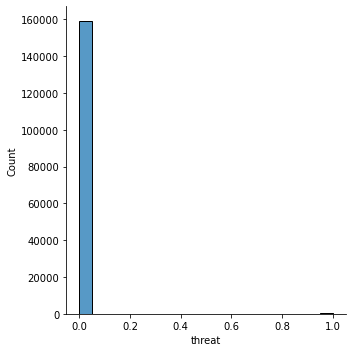

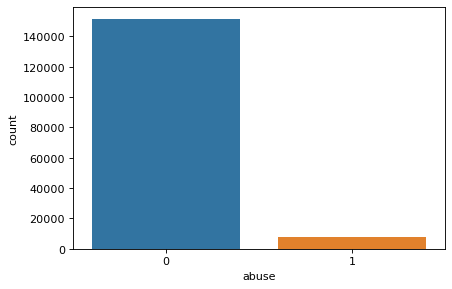

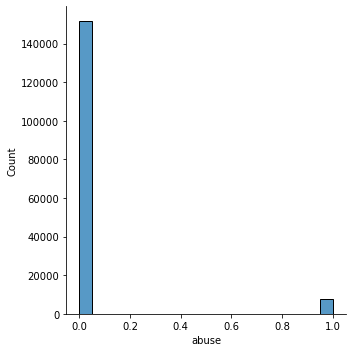

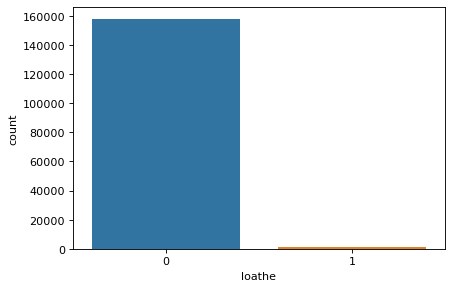

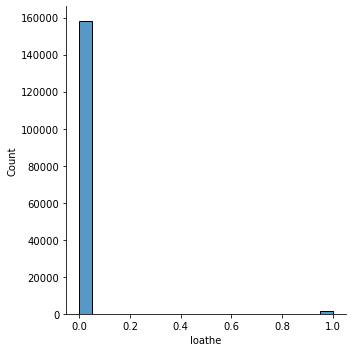

In [20]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    plt.figure(figsize=(6,4),dpi=80)
    sns.countplot(train[i])
    sns.displot(train[i])
    plt.show()

Documentation:- 
    
    Here, I have plotted the countplot and displot for all mentioned columns(above in the code). 

In [21]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Pre-Processing

In [22]:
train['length']= train['comment_text'].str.len()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


Here, I have calculated the length of each comment.

In [23]:
# convert to lower case
train['comment_text']= train['comment_text'].str.lower()

# replace email address
train['comment_text']= train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddr')

# replace web address
train['comment_text']= train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# replace money symbols
train['comment_text']=train['comment_text'].str.replace(r'£|\$', 'moneysymb')

# replace 10 digit phone numbers with 'phonenumber'
train['comment_text']=train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')

# replace normal numbers with 'numbr'
train['comment_text']= train['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

#handling all the punctuation in the comment's
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

#Giving the stopwords and a few extra words along with the pre-defined stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# Used the Lemmatizer in the column, "Comment_text"
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [24]:
train['clean_length'] = train.comment_text.str.len()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47
...,...,...,...,...,...,...,...,...,...
159566,""":::::and second time asking, view completely ...",0,0,0,0,0,0,295,211
159567,ashamed horrible thing put talk page. numbr.numbr,0,0,0,0,0,0,99,49
159568,"spitzer umm, there actual article prostitution...",0,0,0,0,0,0,81,68
159569,look like actually put speedy first version de...,0,0,0,0,0,0,116,60


In [25]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43577387


Here, I can see the the orginal length and then the cleaned length.

## Visualization

### Malignant Words

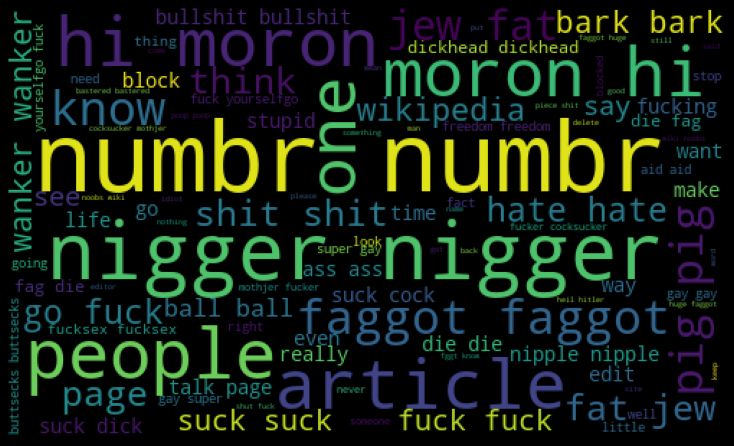

In [26]:
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, Is the WordCloud of 100, "Malignant Words".

### Non-Malignant Words

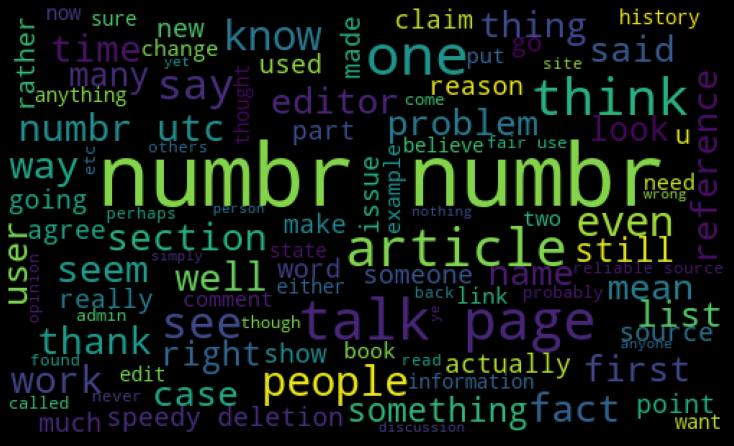

In [27]:
hams = train['comment_text'][train['malignant']==0]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Non-Malignant Words".

### Highly Malignant Words

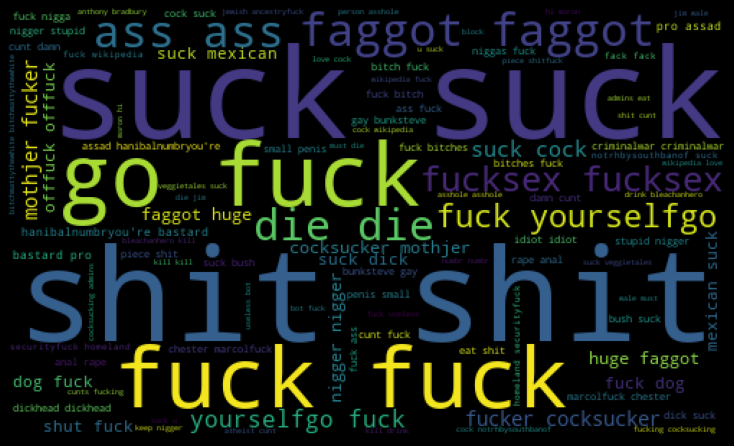

In [28]:
hams = train['comment_text'][train['highly_malignant']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Highly Malignant" words.

### Highly Non-Malignant Words

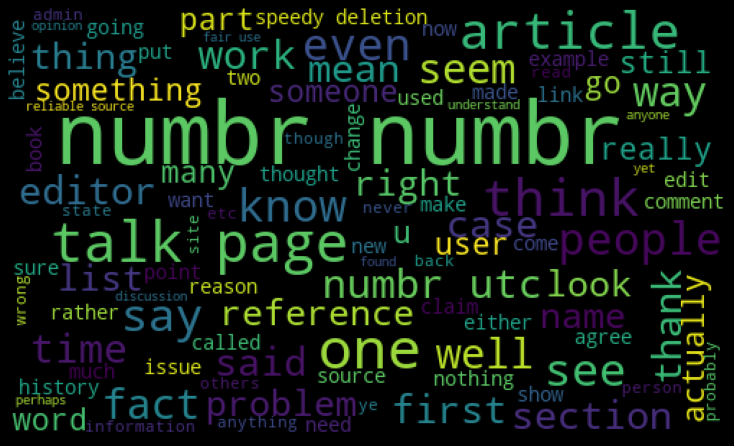

In [29]:
hams = train['comment_text'][train['highly_malignant']==0]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Highly Non-Malignant" words.

### Rude Words

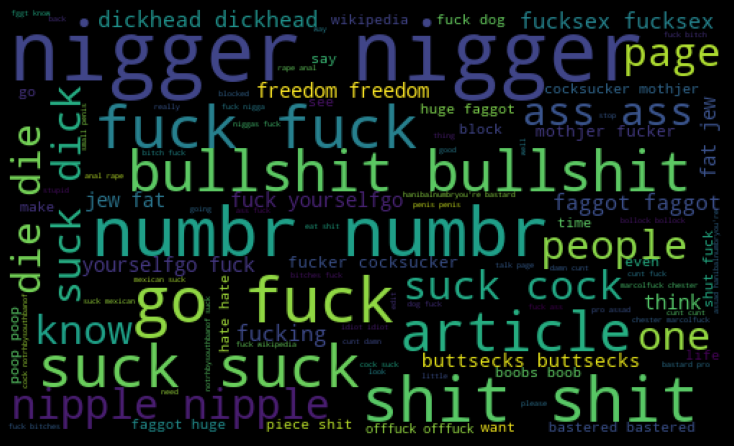

In [30]:
hams = train['comment_text'][train['rude']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Rude" words.

### Non-Rude Words

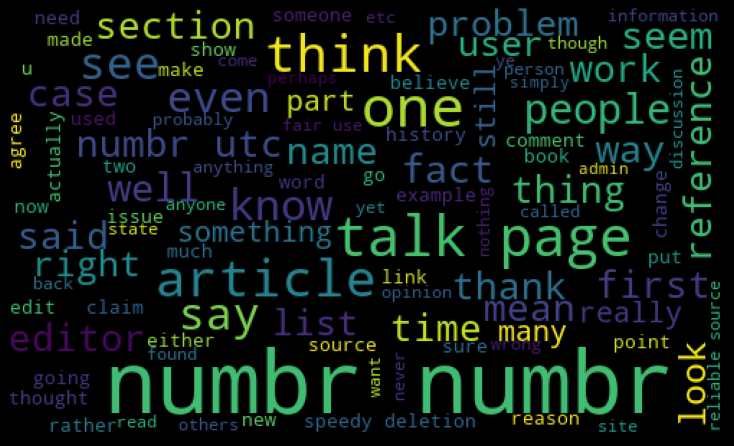

In [31]:
hams = train['comment_text'][train['rude']==0]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Non-Rude" words.

### Threatning Words

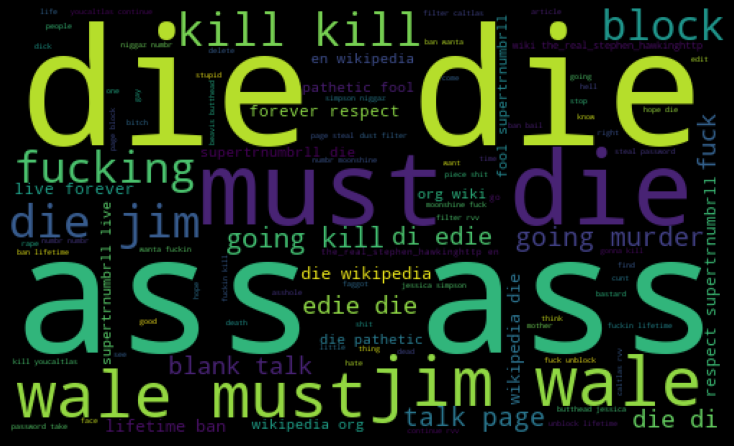

In [32]:
hams = train['comment_text'][train['threat']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Threatning" words.

### Non-Threatning Words

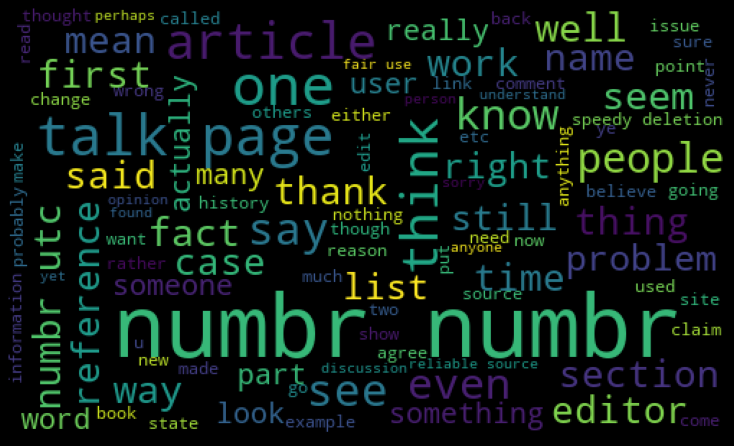

In [33]:
hams = train['comment_text'][train['threat']==0]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Non-Threatning" words.

### Abusive Words

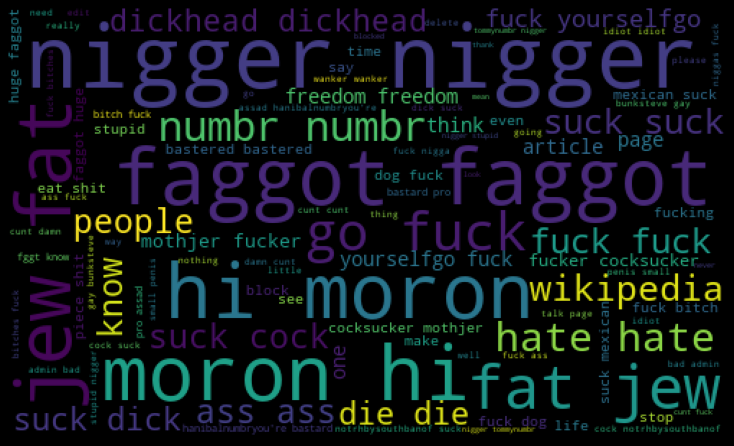

In [34]:
hams = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Abusive" words.

### Non-Abusive Words

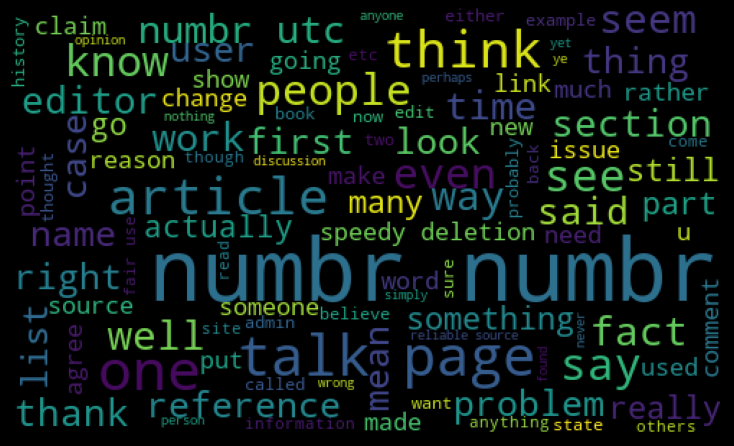

In [35]:
hams = train['comment_text'][train['abuse']==0]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Non-Abusive" words.

### Loathe Words

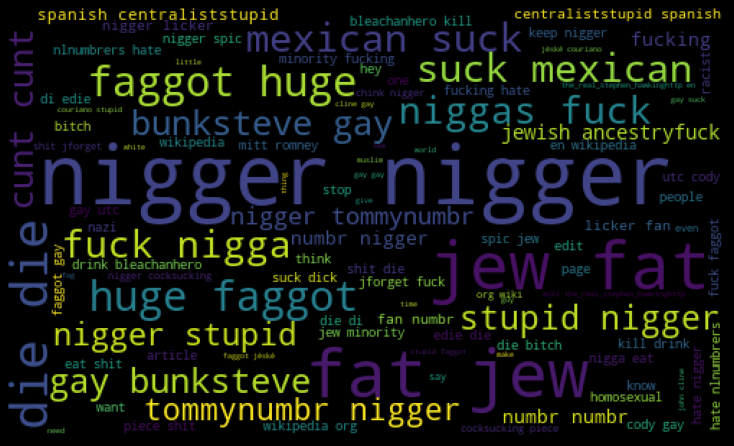

In [36]:
hams = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Loathe" words.

### Non Loathy Words

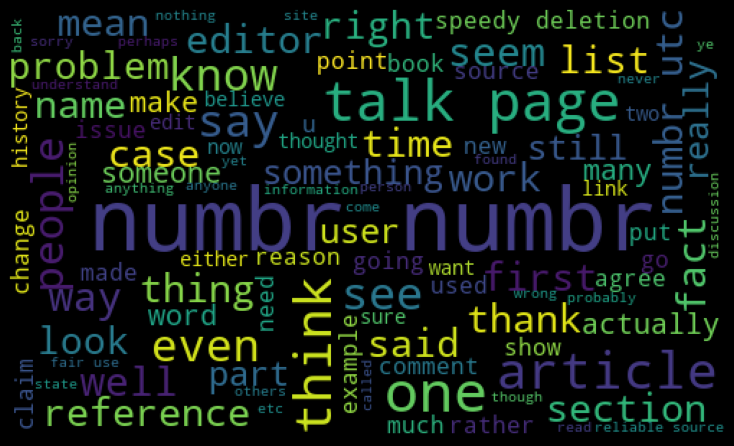

In [37]:
hams = train['comment_text'][train['loathe']==0]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here, is the WordCloud of 100, "Non-Loathy" words.

##### Test CSV

In [38]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [39]:
test.duplicated().sum()

0

In [40]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [41]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0
length,159571.0,394.138847,590.725381,5.0,96.0,205.0,436.0,5000.0
clean_length,159571.0,273.090894,424.272415,3.0,66.0,141.0,297.0,5000.0


In [42]:
test['length'] = test['comment_text'].str.len()
test

,id,comment_text,length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


Here, I have calculated the length of the Comment_text.

In [43]:
#Converting the text into Lower Case
test['comment_text'] = test['comment_text'].str.lower()

#Replace email address
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace web address
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols 
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#Handling all the punctuation in the comment's
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

#Giving the stopwords and a few extra words along with the pre-defined stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


# Used the Lemmatizer in the column, "Comment_text"
lem=WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

test['clean_length'] = test.comment_text.str.len()
test

,id,comment_text,length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,249
1,0000247867823ef7,"== rfc == title fine is, imo.",50,29
2,00013b17ad220c46,== source == zawe ashton lapland —,54,34
3,00017563c3f7919a,":if look back source, information updated corr...",205,117
4,00017695ad8997eb,anonymously edit article all.,41,29
...,...,...,...,...
153159,fffcd0960ee309b5,"totally agree, stuff nothing too-long-crap",60,42
153160,fffd7a9a6eb32c16,== throw field home plate. == get faster throw...,198,117
153161,fffda9e8d6fafa9e,== okinotorishima category == see change agree...,423,293
153162,fffe8f1340a79fc2,"== """"one founding nation eu germany law return...",502,358


In [44]:
print ('Origial Length:', test.length.sum())
print ('Clean Length:', test.clean_length.sum())

Origial Length: 55885733
Clean Length: 38993729


Here, I can see the the orginal length and then the cleaned length.

##### Importing important libraries required for the Model Building.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [46]:
target_columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data = train[target_columns]

train['bad'] = train[target_columns].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


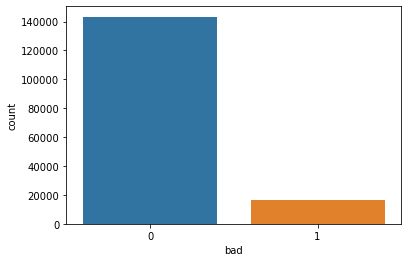

In [47]:
sns.countplot(train['bad'])
plt.show()

In [48]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features
x

<159571x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3366447 stored elements in Compressed Sparse Row format>

In [49]:
train.shape

(159571, 10)

In [50]:
test.shape

(153164, 4)

In [51]:
y= train['bad']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=56,test_size=.30)

In [52]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [53]:
# Logistic Regression
LG = LogisticRegression()
#for trainoing data
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595967734715619
Test accuracy is 0.9553392379679144
[[42729   221]
 [ 1917  3005]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [54]:
# DecisionTree Regression
DTC = DecisionTreeClassifier()
#for trainoing data
DTC.fit(x_train, y_train)
y_pred_train = DTC.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = DTC.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9394009024064172
[[41578  1372]
 [ 1529  3393]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [55]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
#for trainoing data
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9296591733139956
Test accuracy is 0.9181567513368984
[[42604   346]
 [ 3572  1350]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.80      0.27      0.41      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872



In [56]:
# Random Forest Regression
RF = RandomForestClassifier()
#for trainoing data
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988809210467416
Test accuracy is 0.9553183489304813
[[42416   534]
 [ 1605  3317]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [57]:
# AdaBoostClassifier Regression
ada = AdaBoostClassifier()
#for trainoing data
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9463737365598618
Test accuracy is 0.9454169451871658
[[42587   363]
 [ 2250  2672]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.54      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872



In [58]:
# xgboost Regression
xgb = XGBClassifier()
#for trainoing data
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

# for testing data
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9614410155865316
Test accuracy is 0.9526445521390374
[[42686   264]
 [ 2003  2919]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [59]:
# Hypertuning the model with Random forest Classifier:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=5, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988809210467416
Test accuracy is 0.9550676804812834
cross validation score : 95.67026562878806
[[42410   540]
 [ 1611  3311]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



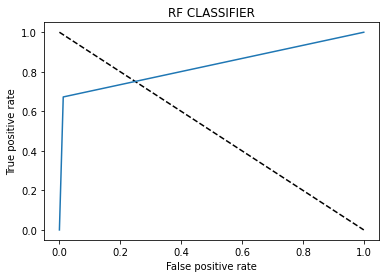

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [61]:
test_data = tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2848168 stored elements in Compressed Sparse Row format>

In [62]:
test['malignant']=RF.predict(test_data)
test['highly_malignant']=RF.predict(test_data)
test['rude']=RF.predict(test_data)
test['threat']=RF.predict(test_data)
test['abuse']=RF.predict(test_data)
test['loathe']=RF.predict(test_data)
test[['id','comment_text','malignant','highly_malignant','rude','threat','abuse','loathe']].to_csv('Malignant_comment_submission.csv', index=False)

In [63]:
test

,id,comment_text,length,clean_length,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,249,0,0,0,0,0,0
1,0000247867823ef7,"== rfc == title fine is, imo.",50,29,0,0,0,0,0,0
2,00013b17ad220c46,== source == zawe ashton lapland —,54,34,0,0,0,0,0,0
3,00017563c3f7919a,":if look back source, information updated corr...",205,117,0,0,0,0,0,0
4,00017695ad8997eb,anonymously edit article all.,41,29,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,"totally agree, stuff nothing too-long-crap",60,42,0,0,0,0,0,0
153160,fffd7a9a6eb32c16,== throw field home plate. == get faster throw...,198,117,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,== okinotorishima category == see change agree...,423,293,1,1,1,1,1,1
153162,fffe8f1340a79fc2,"== """"one founding nation eu germany law return...",502,358,1,1,1,1,1,1


In [64]:
submission = pd.read_csv(r'Malignant_comment_submission.csv')
submission.shape

(153164, 8)

In [65]:
import joblib
joblib.dump(RF,"MalignantComment Prediction.pkl")

['MalignantComment Prediction.pkl']

In [66]:
submission.sample(50)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
12584,15227e5d5f8bb701,==one link== noticed discussion ongoing yester...,0,0,0,0,0,0
42939,47327a760d277939,== jfhq-ncr == said mhwp page would willing re...,1,1,1,1,1,1
18594,1f40c8c78cd1bda3,bot posted,0,0,0,0,0,0
60166,640ba329d78b3a4f,"""someone exchanged word """"poopy"""" word """"nomin...",0,0,0,0,0,0
112516,bbc676cac49aed70,"== please re-lock == hi, could please restore ...",0,0,0,0,0,0
82943,8a4f5ffdbb6a6df9,"realm """"completely unsubstantiated rumour"""", i...",0,0,0,0,0,0
127267,d49fc016d628ba41,español veáse aquí para mi pagina de discusíon...,0,0,0,0,0,0
101591,a986e346a6269e6e,alexhead8835 shut >:(,0,0,0,0,0,0
69449,739acff25a654277,"suggest read first paragraph wp:v, namely """"th...",0,0,0,0,0,0
27817,2e504f92a86e3da7,redirect talk:starry moray eel,0,0,0,0,0,0
